<a href="https://colab.research.google.com/github/Ernesto1717/NecstCamp/blob/main/Bio_image_project/colab_rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import random
import numpy as np


from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

import nibabel as nib

IMG_WIDTH = 256
IMG_HEIGHT = 256 
IMG_CHANNELS = 1

#TRAIN_PATH = r"/content"
#LABELS_PATH = r"/content/drive/MyDrive/NECSTCamp/Labels"
#TEST_PATH = r"/content"

data_path = "/content/drive/MyDrive/BioImage/kits19/data/case_"

def extractImages( start, end):

    images = []
    
    prefix = '/imaging'

    postfix = ".nii.gz"    
    
    for out in tqdm(range(start, end)):
        img = nib.load(data_path + f'{out:05d}' + prefix + postfix ).get_fdata()
        img = (img - img.min()) / (max((img.max() - img.min()), 1e-3))
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH))

        count=1 
        for j in range(0,int(img.shape[0]),12):
          if( j>20 and j<230):
            #print('paziente ',out,'slice ',count)
            images.append(resize(img[j,:,:], (IMG_HEIGHT, IMG_WIDTH)))
            count+=1
        print(out)


    return images

In [2]:
IMG_WIDTH = 256
IMG_HEIGHT = 256 
IMG_CHANNELS = 1

#TRAIN_PATH = r"/content"
#LABELS_PATH = r"/content/drive/MyDrive/NECSTCamp/Labels"
#TEST_PATH = r"/content"

data_path = "/content/drive/MyDrive/BioImage/kits19/data/case_"

def extractseg(start, end):
    images = []
    prefix = '/segmentation'
    postfix = ".nii.gz"    
    
    for out in tqdm(range(start, end)):
        img = nib.load(data_path + f'{out:05d}' + prefix + postfix ).get_fdata()
        img = (img - img.min()) / (max((img.max() - img.min()), 1e-3))
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH))
        
        count=1 
        for j in range(0,int(img.shape[0]),12):
          if( j>20 and j<230):
            #print('paziente ',out,'slice ',count)
            images.append(resize(img[j,:,:], (IMG_HEIGHT, IMG_WIDTH)))
            count+=1
        print(out)

    return images

In [ ]:
UP_TRAIN = 85
UP_VALID = 115

train_img = np.array(extractImages(0,UP_TRAIN))
print('train_img done')
#train_prova = np.array(extractprova(0,UP_TRAIN))
train_label = np.array(extractseg(0,UP_TRAIN))
print('train_Label done')
valid_img = np.array(extractImages(UP_TRAIN+1,UP_VALID))
print('valid_img done')
valid_label = np.array(extractseg(UP_TRAIN+1,UP_VALID))
print('valid_label done')

In [ ]:
import numpy
import matplotlib.pyplot as plt

slice = 7
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(train_img[slice,:,:])
imgplot_seg = plt.imshow(train_label[slice,:,:])
a = fig.add_subplot(1,2,2)
plt.clf()  
for i in range (0,len(train_img),1):
  print("layer_",i,"img:")
  imgplot = plt.imshow(train_img[i,:,:])
  plt.show()
  print("layer_",i,"label:")
  imgplot_seg = plt.imshow(train_label[i,:,:])
  plt.show()
  #print("layer_",i,"prova:")
  #imgplot_seg = plt.imshow(train_prova[i,:,:])
  #plt.show()

print('-----------train printed--------------')  
print('-----------train printed--------------')  
print('-----------train printed--------------')  
for i in range (0,len(valid_img),1):
  print("layer_",i,"img:")
  imgplot = plt.imshow(valid_img[i,:,:])
  plt.show()
  print("layer_",i,"label:")
  imgplot_seg = plt.imshow(valid_label[i,:,:])
  plt.show()  

In [4]:
import tensorflow
import keras 

In [5]:
def uNet():

    #Contraction path
    # 256x256
    c1 = tf.keras.layers.Conv2D(
        16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(256, 256, 1))(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c1)

    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    # 128x128
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p1)

    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c2)

    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    # 64x64
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c3)

    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    # 32x32
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c4)

    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    # 16x16
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(
        128, (2, 2), strides=(2, 2), padding='same')(c5)
    # 32x32
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c6)

    # 64x64
    u7 = tf.keras.layers.Conv2DTranspose(
        64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c7)

    # 128x128
    u8 = tf.keras.layers.Conv2DTranspose(
        32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c8)

    # 256x256
    u9 = tf.keras.layers.Conv2DTranspose(
        16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    return outputs

In [48]:
#Build the model
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Building the model...')
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

outputs = uNet()

adam = tf.keras.optimizers.Adam(learning_rate=0.000035)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

'''
model.compile(optimizer= optimizer, 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])
'''             


#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    'model_for_nuclei.h5', verbose=1, save_best_only=True
    )

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
    ]

results = model.fit(train_img, train_label, validation_split=0.1,
                    batch_size=25, epochs=25, callbacks=callbacks)

####################################

idx = random.randint(0, len(train_img))


preds_train = model.predict(train_img[:int(train_img.shape[0]*0.9)], verbose=1)
preds_val = model.predict(train_img[int(train_img.shape[0]*0.9):], verbose=1)
preds_test = model.predict(valid_img, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Building the model...
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda_9 (Lambda)              (None, 256, 256, 1)  0           ['input_10[0][0]']               
                                                                                                  
 conv2d_171 (Conv2D)            (None, 256, 256, 16  160         ['lambda_9[0][0]']               
                                )                                                                 
                                     

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
label (256, 256)


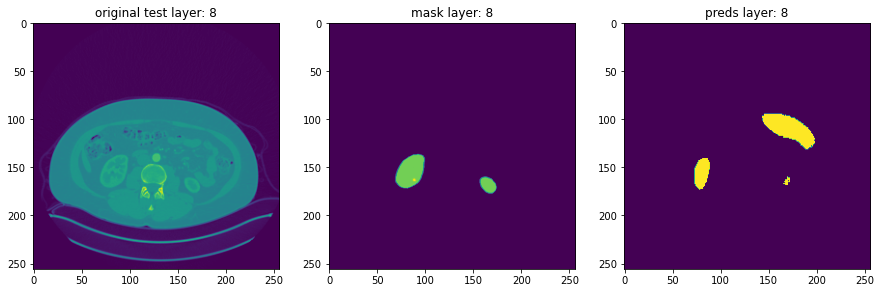

label (256, 256)


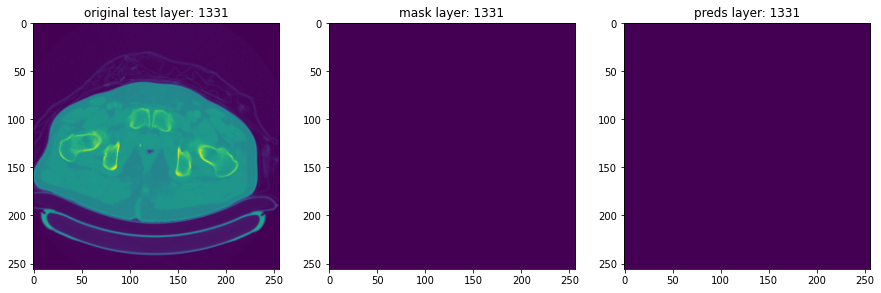

label (256, 256)


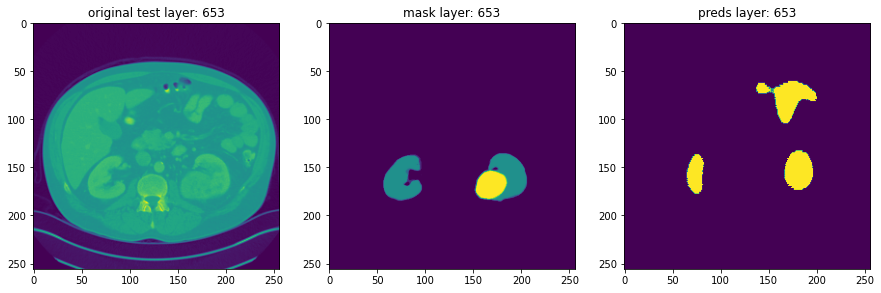

In [57]:
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
# 1
sanityCheck(train_img, train_label, preds_train_t)
#2
sanityCheck(train_img, train_label, preds_train_t)
# 3
sanityCheck(train_img, train_label, preds_train_t)

In [7]:
def sanityCheck(train_img, train_label, preds_train_t):
    ix = random.randint(0, len(preds_train_t))

    fig, ax = plt.subplots(1, 3,figsize=(15,5))

    ax[0].imshow(train_img[ix])
    ax[0].set_title("original test layer: " + str(ix) )

    print('label',train_label[ix].shape)

    ax[1].imshow(train_label[ix])
    ax[1].set_title("mask layer: " + str(ix) )

    ax[2].imshow(preds_train_t[ix][:, :, 0])
    ax[2].set_title("preds layer: " + str(ix) )

    plt.show()